In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Colab için önemli

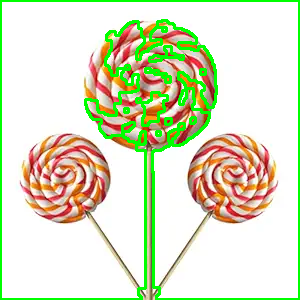

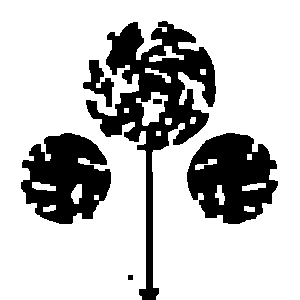

In [ ]:
# Resmi yükle
image = cv2.imread("denemeci0.jpg")

# 1. Renk Algılama
# Renk aralıklarını tanımla
# Turuncu renk için aralık
lower_orange = np.array([10, 100, 100])
upper_orange = np.array([25, 255, 255])

# Pembe renk için aralık
lower_pink = np.array([140, 100, 100])
upper_pink = np.array([180, 255, 255])

# Beyaz renk için aralık
lower_white = np.array([0, 0, 200])
upper_white = np.array([180, 30, 255])

# Görüntüyü HSV formatına çevir
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Belirtilen aralığın içindeki pikselleri bul
mask_orange = cv2.inRange(hsv_image, lower_orange, upper_orange)
mask_pink = cv2.inRange(hsv_image, lower_pink, upper_pink)
mask_white = cv2.inRange(hsv_image, lower_white, upper_white)

# Tüm maskeleri birleştir
combined_mask = cv2.bitwise_or(mask_orange, mask_pink)
combined_mask = cv2.bitwise_or(combined_mask, mask_white)

# Maskeyi açma işlemi ile iyileştir (gürültü azaltma)
kernel = np.ones((5, 5), np.uint8)
morph_opened = cv2.morphologyEx(combined_mask, cv2.MORPH_OPEN, kernel)

# Sınırları belirleme (kapatma işlemi)
morph_closed = cv2.morphologyEx(morph_opened, cv2.MORPH_CLOSE, kernel)

# 2. Kontur Tespiti
# Konturları bul
contours, _ = cv2.findContours(morph_closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Orijinal resmi kopyala
output_image = image.copy()

# Konturları çizecek şekilde sınırları belirle
for contour in contours:
    cv2.drawContours(output_image, [contour], -1, (0, 255, 0), 2)  # Yeşil renk ile çiz

# Sonuçları göster
# Use cv2_imshow instead of cv2.imshow
cv2_imshow(output_image)  # Orijinal görüntü üzerindeki konturlar
cv2_imshow(morph_closed)  # Uygulanan maske
